In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
df_test = pd.read_csv("test.csv")
#df_train = pd.read_csv("train.csv")

In [3]:
df_test

,id,gender,group,preparation rating,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score,Admission Fees,Education Level of Parents
0,800,male,A3,5,67,73,68,58,standard,ED
1,801,male,A3,5,76,80,73,74,standard,ED
2,802,female,group E,2,87,94,95,87,standard,associate's degree
3,803,female,A2,3,82,85,87,97,standard,CD
4,804,female,A3,4,73,76,78,68,standard,CD
...,...,...,...,...,...,...,...,...,...,...
195,995,female,group E,5,88,99,95,94,standard,master's degree
196,996,male,A3,4,62,55,55,60,free,ED
197,997,female,A3,5,59,71,65,69,free,ED
198,998,female,A4,5,68,78,77,87,standard,CD


In [4]:
#df_train

In [5]:
df_test.shape

(200, 10)

In [6]:
#df_train.shape

In [7]:
df_test.isna().sum()

id                                                0
gender                                            0
group                                             0
preparation rating                                0
CSE1203 Discrete Mathematics score                0
EEE2142 Electronic Devices and Circuits' score    0
CSE2200 Software Development I's score            0
MATH2203 Mathematics IV's score                   0
Admission Fees                                    0
Education Level of Parents                        0
dtype: int64

In [8]:
#df_train.isna().sum()

In [9]:
df_test = df_test.drop('id', axis=1)

In [10]:
#df_train = df_train.drop('id', axis=1)

In [11]:
#merge_df = [df_test, df_train]

In [12]:
#df = pd.concat(merge_df)

In [15]:
df = df_test

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   gender                                          200 non-null    object
 1   group                                           200 non-null    object
 2   preparation rating                              200 non-null    int64 
 3   CSE1203 Discrete Mathematics score              200 non-null    int64 
 4   EEE2142 Electronic Devices and Circuits' score  200 non-null    int64 
 5   CSE2200 Software Development I's score          200 non-null    int64 
 6   MATH2203 Mathematics IV's score                 200 non-null    int64 
 7   Admission Fees                                  200 non-null    object
 8   Education Level of Parents                      200 non-null    object
dtypes: int64(5), object(4)
memory usage: 14.2+ KB


In [17]:
df.columns=df.columns.str.replace("'",'')

In [18]:
df.rename(columns={'preparation rating': 'target', 'CSE1203 Discrete Mathematics score': 'CSE_dis_math_score', 
                   'EEE2142 Electronic Devices and Circuits score': 'EEE_elctrnc_circuits_score', 
                   'CSE2200 Software Development Is score': 'CSE_softwr_devlplmnt_score', 
                   'MATH2203 Mathematics IVs score': 'Mathematics_ivs_score', 'Admission Fees': 'Admission_fees', 
                   'Education Level of Parents': 'Education_level_of_parent'}, inplace=True)

In [19]:
df

,gender,group,target,CSE_dis_math_score,EEE_elctrnc_circuits_score,CSE_softwr_devlplmnt_score,Mathematics_ivs_score,Admission_fees,Education_level_of_parent
0,male,A3,5,67,73,68,58,standard,ED
1,male,A3,5,76,80,73,74,standard,ED
2,female,group E,2,87,94,95,87,standard,associate's degree
3,female,A2,3,82,85,87,97,standard,CD
4,female,A3,4,73,76,78,68,standard,CD
...,...,...,...,...,...,...,...,...,...
195,female,group E,5,88,99,95,94,standard,master's degree
196,male,A3,4,62,55,55,60,free,ED
197,female,A3,5,59,71,65,69,free,ED
198,female,A4,5,68,78,77,87,standard,CD


In [20]:
df['target'].unique()

array([5, 2, 3, 4, 0, 1], dtype=int64)

In [21]:
df['target'].value_counts()

5    75
4    30
0    27
1    26
3    22
2    20
Name: target, dtype: int64

In [22]:
df['gender'].unique()

array(['male', 'female'], dtype=object)

In [23]:
gender = pd.get_dummies(df['gender'], prefix='gender', drop_first=False)

In [24]:
gender

,gender_female,gender_male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,0,1
197,1,0
198,1,0


In [25]:
df = pd.concat((df, gender), axis=1)

In [26]:
df['group'].unique()

array(['A3', 'group E', 'A2', 'A1', 'A4'], dtype=object)

In [27]:
df['group'] = df['group'].str.replace('A3','A_three')

In [28]:
df['group'] = df['group'].str.replace('group E','group_E')

In [29]:
df['group'] = df['group'].str.replace('A2','A_two')

In [30]:
df['group'] = df['group'].str.replace('A1','A_one')

In [31]:
df['group'] = df['group'].str.replace('A4','A_four')

In [32]:
df['group'].unique()

array(['A_three', 'group_E', 'A_two', 'A_one', 'A_four'], dtype=object)

In [33]:
df.group=df.group.map({'A_one':1,'A_two':2,'A_three':3,'A_four':4,'group_E':5})
df['group'].value_counts()

3    61
4    51
5    34
2    32
1    22
Name: group, dtype: int64

In [34]:
df['Admission_fees'].unique()

array(['standard', 'free'], dtype=object)

In [35]:
Admission_fees = pd.get_dummies(df['Admission_fees'], prefix='Admission_fees', drop_first=False)

In [36]:
Admission_fees

,Admission_fees_free,Admission_fees_standard
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
195,0,1
196,1,0
197,1,0
198,0,1


In [37]:
df = pd.concat((df, Admission_fees), axis=1)

In [38]:
df['Education_level_of_parent'].unique()

array(['ED', "associate's degree", 'CD', 'BD', "master's degree"],
      dtype=object)

In [39]:
df['Education_level_of_parent'] = df['Education_level_of_parent'].str.replace("'",'')

In [40]:
df['Education_level_of_parent'].unique()

array(['ED', 'associates degree', 'CD', 'BD', 'masters degree'],
      dtype=object)

In [41]:
df['Education_level_of_parent'] = df['Education_level_of_parent'].str.replace('associates degree', 'associates_degree')

In [42]:
df['Education_level_of_parent'] = df['Education_level_of_parent'].str.replace('masters degree', 'masters_degree')

In [43]:
df['Education_level_of_parent'].unique()

array(['ED', 'associates_degree', 'CD', 'BD', 'masters_degree'],
      dtype=object)

In [44]:
df.Education_level_of_parent=df.Education_level_of_parent.map({'ED':1,'associates_degree':2,'CD':3,'BD':4,'masters_degree':5})
df['Education_level_of_parent'].value_counts()

1    86
3    42
2    36
4    24
5    12
Name: Education_level_of_parent, dtype: int64

In [47]:
#df = pd.concat((df, Education_level), axis=1)

In [45]:
df = df.drop('gender', axis=1)

In [46]:
#df = df.drop('group', axis=1)

In [47]:
df = df.drop('Admission_fees', axis=1)

In [48]:
#df = df.drop('Education_level_of_parent', axis=1)

In [49]:
df

,group,target,CSE_dis_math_score,EEE_elctrnc_circuits_score,CSE_softwr_devlplmnt_score,Mathematics_ivs_score,Education_level_of_parent,gender_female,gender_male,Admission_fees_free,Admission_fees_standard
0,3,5,67,73,68,58,1,0,1,0,1
1,3,5,76,80,73,74,1,0,1,0,1
2,5,2,87,94,95,87,2,1,0,0,1
3,2,3,82,85,87,97,3,1,0,0,1
4,3,4,73,76,78,68,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
195,5,5,88,99,95,94,5,1,0,0,1
196,3,4,62,55,55,60,1,0,1,1,0
197,3,5,59,71,65,69,1,1,0,1,0
198,4,5,68,78,77,87,3,1,0,0,1


In [50]:
df.columns.value_counts()

group                         1
target                        1
CSE_dis_math_score            1
EEE_elctrnc_circuits_score    1
CSE_softwr_devlplmnt_score    1
Mathematics_ivs_score         1
Education_level_of_parent     1
gender_female                 1
gender_male                   1
Admission_fees_free           1
Admission_fees_standard       1
dtype: int64

In [51]:
df.dtypes

group                         int64
target                        int64
CSE_dis_math_score            int64
EEE_elctrnc_circuits_score    int64
CSE_softwr_devlplmnt_score    int64
Mathematics_ivs_score         int64
Education_level_of_parent     int64
gender_female                 uint8
gender_male                   uint8
Admission_fees_free           uint8
Admission_fees_standard       uint8
dtype: object

<AxesSubplot:>

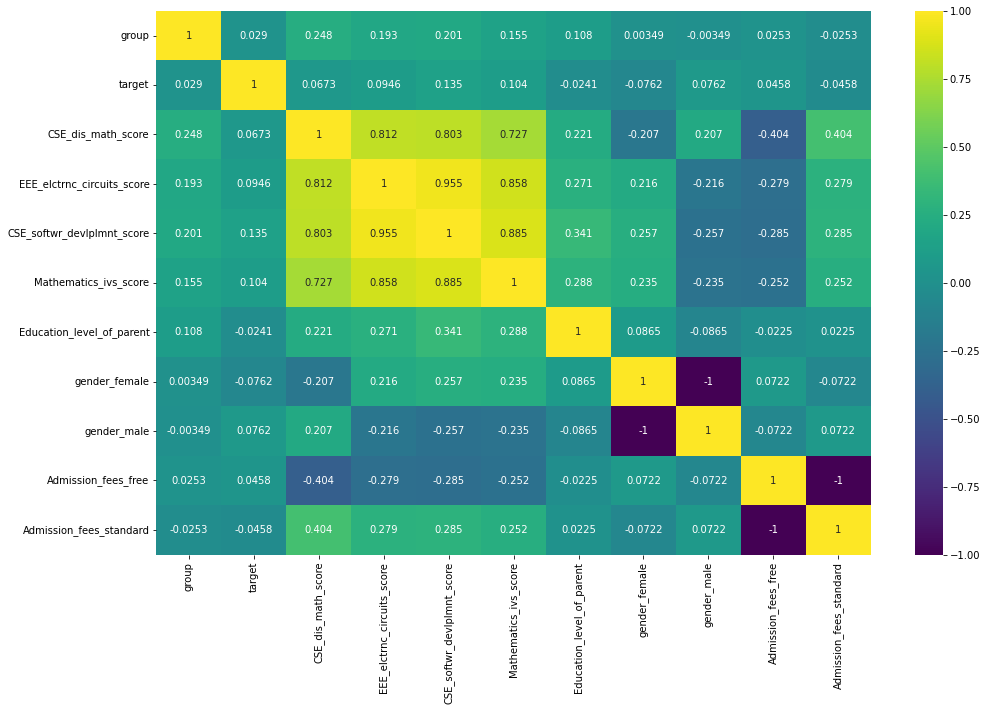

In [52]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, fmt='.3g', cmap='viridis', cbar=True)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2585: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2585: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2585: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

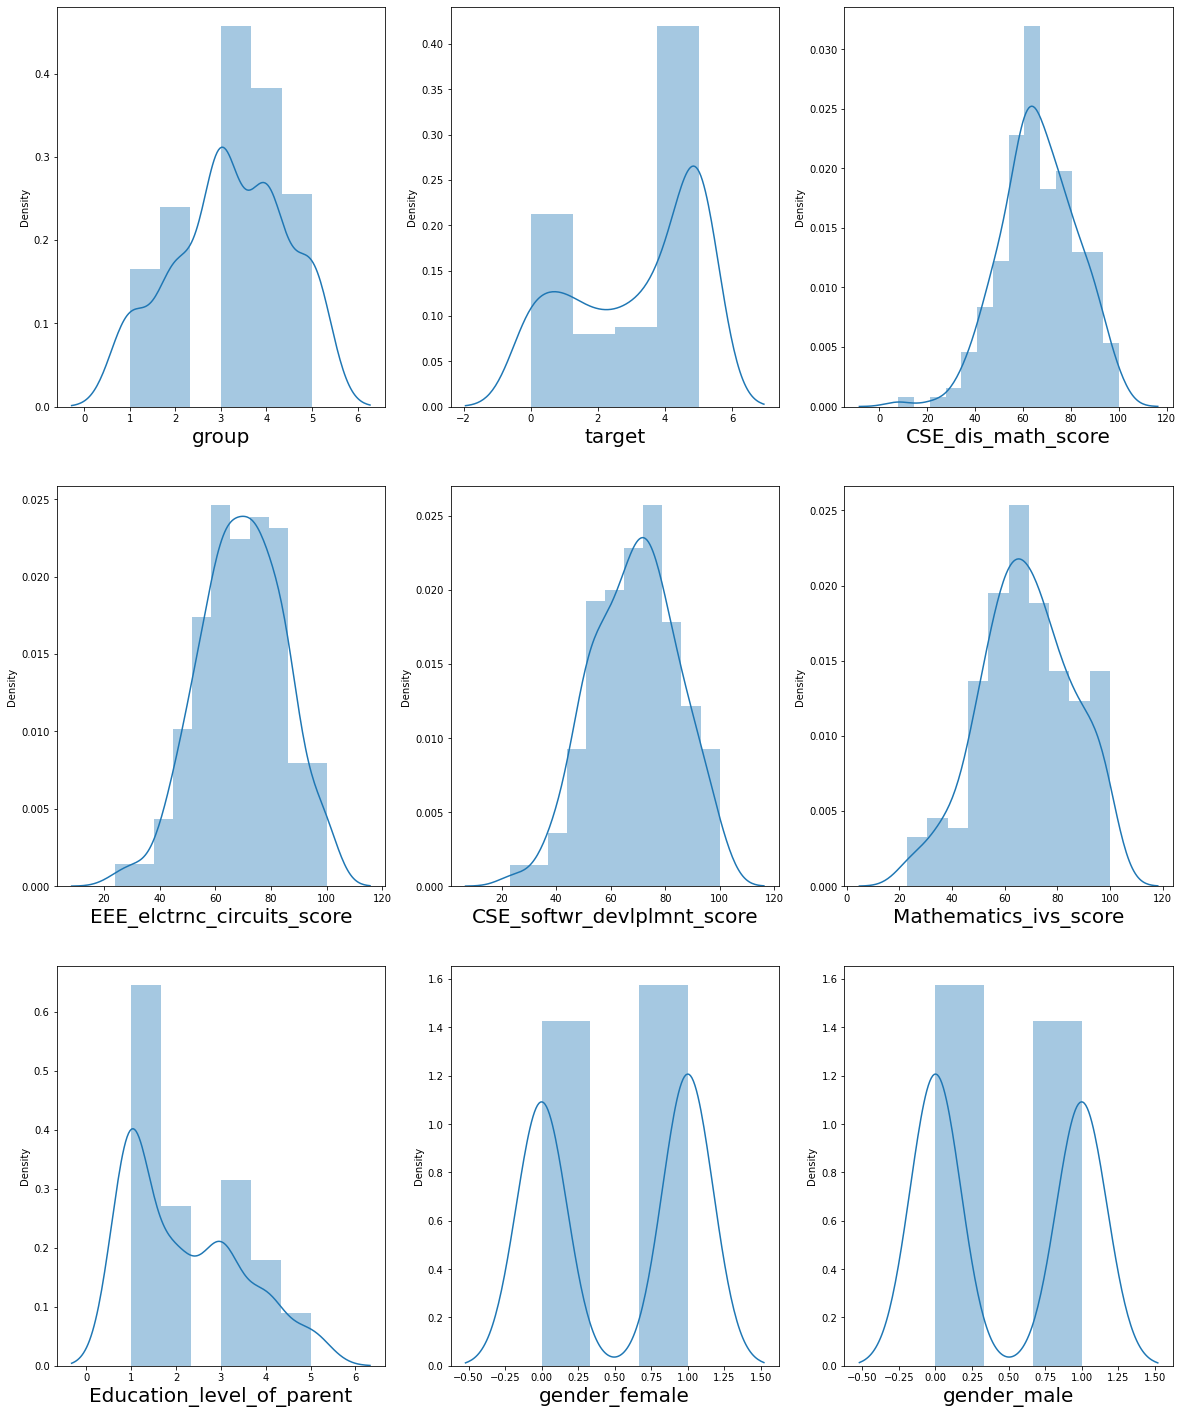

In [53]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :    
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [54]:
df.columns

Index(['group', 'target', 'CSE_dis_math_score', 'EEE_elctrnc_circuits_score',
       'CSE_softwr_devlplmnt_score', 'Mathematics_ivs_score',
       'Education_level_of_parent', 'gender_female', 'gender_male',
       'Admission_fees_free', 'Admission_fees_standard'],
      dtype='object')

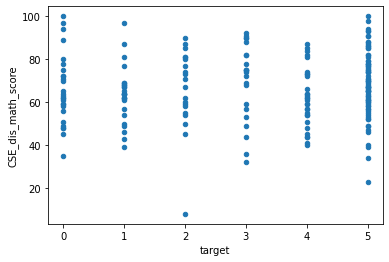

In [55]:
df.plot(x='target',y='CSE_dis_math_score',kind='scatter')
plt.show()

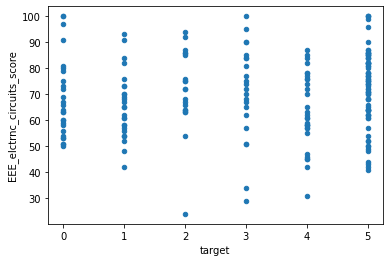

In [56]:
df.plot(x='target',y='EEE_elctrnc_circuits_score',kind='scatter')
plt.show()

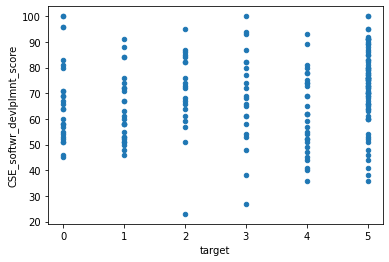

In [57]:
df.plot(x='target',y='CSE_softwr_devlplmnt_score',kind='scatter')
plt.show()

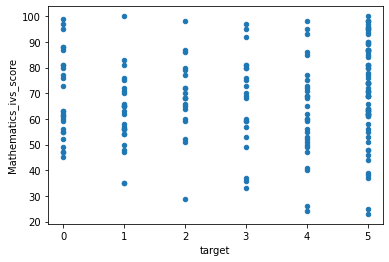

In [58]:
df.plot(x='target',y='Mathematics_ivs_score',kind='scatter')
plt.show()

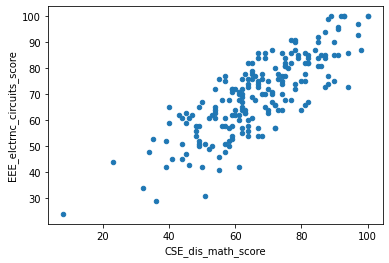

In [59]:
df.plot(x='CSE_dis_math_score',y='EEE_elctrnc_circuits_score',kind='scatter')
plt.show()

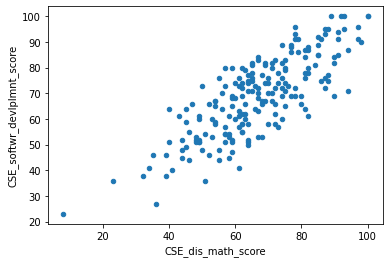

In [60]:
df.plot(x='CSE_dis_math_score',y='CSE_softwr_devlplmnt_score',kind='scatter')
plt.show()

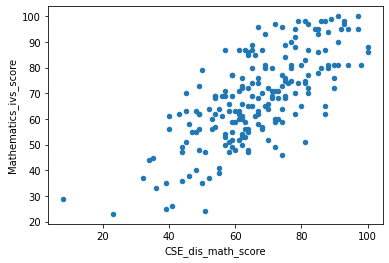

In [61]:
df.plot(x='CSE_dis_math_score',y='Mathematics_ivs_score',kind='scatter')
plt.show()

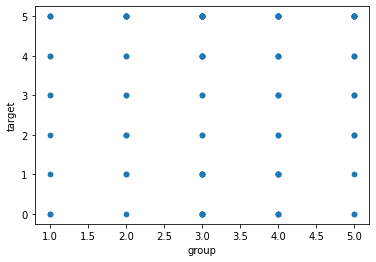

In [62]:
df.plot(x='group',y='target',kind='scatter')
plt.show()

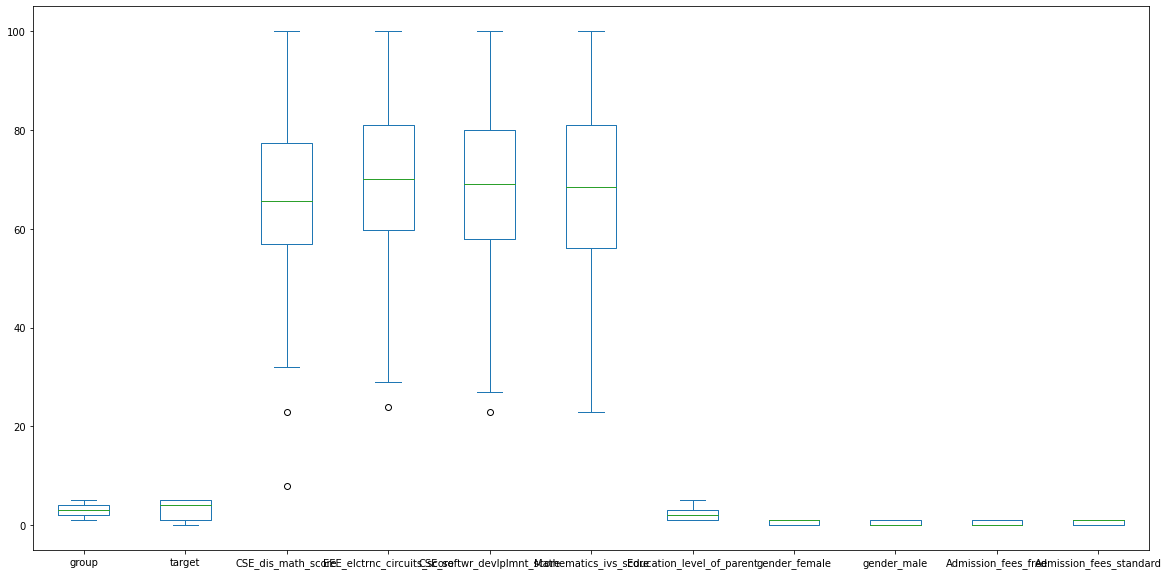

In [63]:
df.plot(kind='box',figsize=(20,10))
plt.show()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CSE_dis_math_score'>

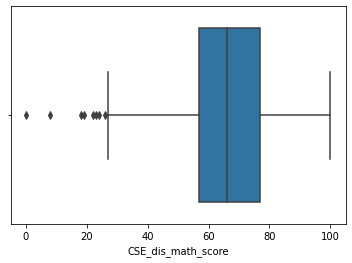

In [68]:
sns.boxplot(df['CSE_dis_math_score'])

In [69]:
upper_limit = df['CSE_dis_math_score'].quantile(0.99)
lower_limit = df['CSE_dis_math_score'].quantile(0.01)

In [70]:
new_df = df[(df['CSE_dis_math_score'] <= 100) & (df['CSE_dis_math_score'] >= 27.0)]

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2585: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CSE_dis_math_score', ylabel='Density'>

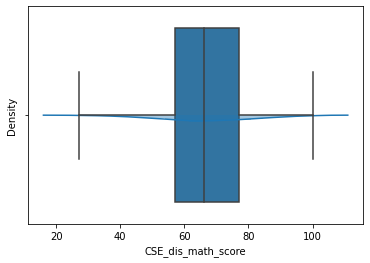

In [71]:
sns.distplot(new_df['CSE_dis_math_score'])
sns.boxplot(new_df['CSE_dis_math_score'])

In [72]:
df['CSE_dis_math_score'] = np.where(df['CSE_dis_math_score'] >= upper_limit,
        upper_limit,
        np.where(df['CSE_dis_math_score'] <= lower_limit,
        lower_limit,
        df['CSE_dis_math_score']))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2585: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CSE_dis_math_score', ylabel='Density'>

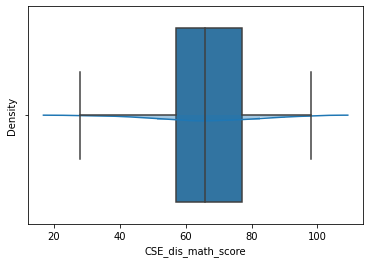

In [73]:
sns.distplot(df['CSE_dis_math_score'])
sns.boxplot(df['CSE_dis_math_score'])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EEE_elctrnc_circuits_score'>

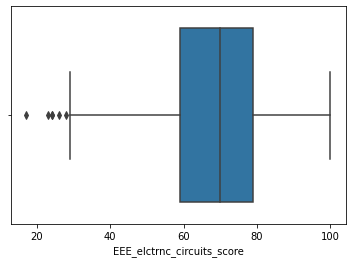

In [74]:
sns.boxplot(df['EEE_elctrnc_circuits_score'])

In [75]:
upper_limit = df['EEE_elctrnc_circuits_score'].quantile(0.99)
lower_limit = df['EEE_elctrnc_circuits_score'].quantile(0.01)

In [76]:
new_df = df[(df['EEE_elctrnc_circuits_score'] <= 100) & (df['EEE_elctrnc_circuits_score'] >= 30.3)]

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2585: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EEE_elctrnc_circuits_score', ylabel='Density'>

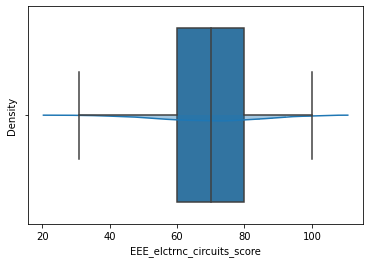

In [77]:
sns.distplot(new_df['EEE_elctrnc_circuits_score'])
sns.boxplot(new_df['EEE_elctrnc_circuits_score'])

In [78]:
df['EEE_elctrnc_circuits_score'] = np.where(df['EEE_elctrnc_circuits_score'] >= upper_limit,
        upper_limit,
        np.where(df['EEE_elctrnc_circuits_score'] <= lower_limit,
        lower_limit,
        df['EEE_elctrnc_circuits_score']))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2585: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EEE_elctrnc_circuits_score', ylabel='Density'>

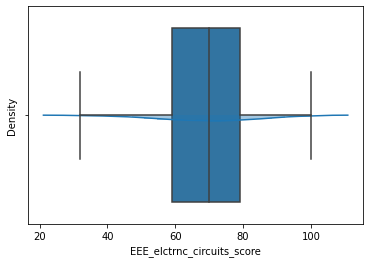

In [79]:
sns.distplot(df['EEE_elctrnc_circuits_score'])
sns.boxplot(df['EEE_elctrnc_circuits_score'])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CSE_softwr_devlplmnt_score'>

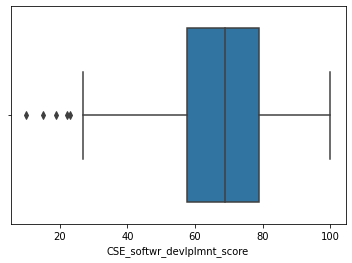

In [80]:
sns.boxplot(df['CSE_softwr_devlplmnt_score'])

In [81]:
upper_limit = df['CSE_softwr_devlplmnt_score'].quantile(0.99)
lower_limit = df['CSE_softwr_devlplmnt_score'].quantile(0.01)

In [82]:
new_df = df[(df['CSE_softwr_devlplmnt_score'] <= 100) & (df['CSE_softwr_devlplmnt_score'] >= 24.3)]

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2585: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CSE_softwr_devlplmnt_score', ylabel='Density'>

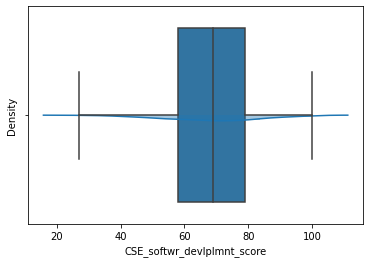

In [83]:
sns.distplot(new_df['CSE_softwr_devlplmnt_score'])
sns.boxplot(new_df['CSE_softwr_devlplmnt_score'])

In [84]:
df['CSE_softwr_devlplmnt_score'] = np.where(df['CSE_softwr_devlplmnt_score'] >= upper_limit,
        upper_limit,
        np.where(df['CSE_softwr_devlplmnt_score'] <= lower_limit,
        lower_limit,
        df['CSE_softwr_devlplmnt_score']))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2585: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CSE_softwr_devlplmnt_score', ylabel='Density'>

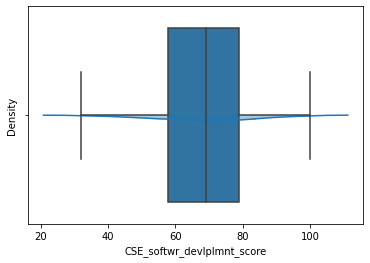

In [85]:
sns.distplot(df['CSE_softwr_devlplmnt_score'])
sns.boxplot(df['CSE_softwr_devlplmnt_score'])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mathematics_ivs_score'>

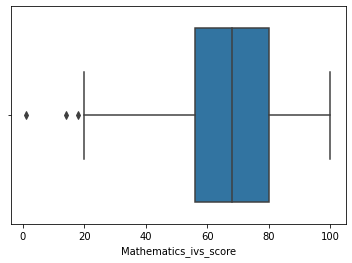

In [86]:
sns.boxplot(df['Mathematics_ivs_score'])

In [87]:
upper_limit = df['Mathematics_ivs_score'].quantile(0.99)
lower_limit = df['Mathematics_ivs_score'].quantile(0.01)

In [88]:
new_df = df[(df['Mathematics_ivs_score'] <= 100) & (df['Mathematics_ivs_score'] >= 21.0)]

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2585: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mathematics_ivs_score', ylabel='Density'>

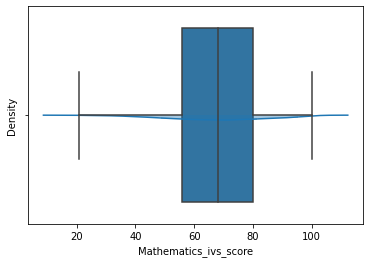

In [89]:
sns.distplot(new_df['Mathematics_ivs_score'])
sns.boxplot(new_df['Mathematics_ivs_score'])

In [90]:
df['Mathematics_ivs_score'] = np.where(df['Mathematics_ivs_score'] >= upper_limit,
        upper_limit,
        np.where(df['Mathematics_ivs_score'] <= lower_limit,
        lower_limit,
        df['Mathematics_ivs_score']))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2585: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mathematics_ivs_score', ylabel='Density'>

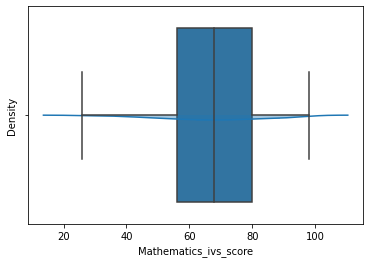

In [91]:
sns.distplot(df['Mathematics_ivs_score'])
sns.boxplot(df['Mathematics_ivs_score'])

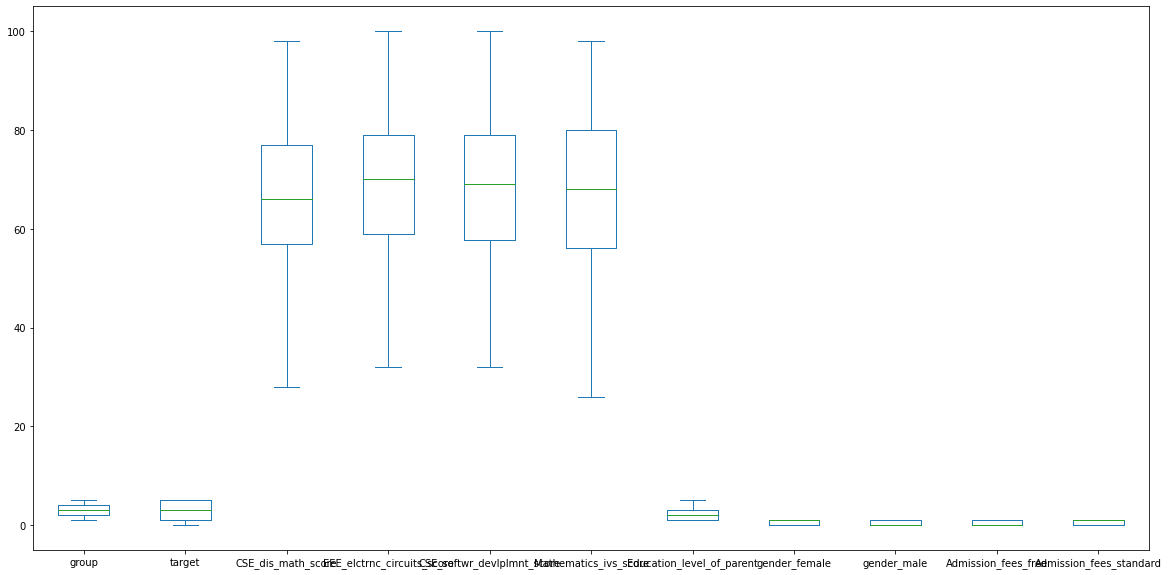

In [94]:
df.plot(kind='box',figsize=(20,10))
plt.show()

In [64]:
df

,group,target,CSE_dis_math_score,EEE_elctrnc_circuits_score,CSE_softwr_devlplmnt_score,Mathematics_ivs_score,Education_level_of_parent,gender_female,gender_male,Admission_fees_free,Admission_fees_standard
0,3,5,67,73,68,58,1,0,1,0,1
1,3,5,76,80,73,74,1,0,1,0,1
2,5,2,87,94,95,87,2,1,0,0,1
3,2,3,82,85,87,97,3,1,0,0,1
4,3,4,73,76,78,68,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
195,5,5,88,99,95,94,5,1,0,0,1
196,3,4,62,55,55,60,1,0,1,1,0
197,3,5,59,71,65,69,1,1,0,1,0
198,4,5,68,78,77,87,3,1,0,0,1


In [65]:
df.describe()

,group,target,CSE_dis_math_score,EEE_elctrnc_circuits_score,CSE_softwr_devlplmnt_score,Mathematics_ivs_score,Education_level_of_parent,gender_female,gender_male,Admission_fees_free,Admission_fees_standard
count,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.215000,3.1350,66.500000,69.490000,68.735000,68.080000,2.200000,0.525000,0.475000,0.395000,0.605000
std,1.223216,1.8666,15.658414,15.043652,15.605204,17.421283,1.275986,0.500628,0.500628,0.490077,0.490077
min,1.000000,0.0000,8.000000,24.000000,23.000000,23.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.0000,57.000000,59.750000,58.000000,56.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,4.0000,65.500000,70.000000,69.000000,68.500000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,4.000000,5.0000,77.250000,81.000000,80.000000,81.000000,3.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,5.0000,100.000000,100.000000,100.000000,100.000000,5.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
#df['preparation_rating'] = df['preparation_rating'].apply(lambda x: int(x))

In [75]:
#df['CSE_dis_math_score'] = df['CSE_dis_math_score'].apply(lambda x: float(x))

In [191]:
#df['EEE_elctrnc_circuits_score'] = df['EEE_elctrnc_circuits_score'].apply(lambda x: int(x))

In [192]:
#df['CSE_softwr_devlplmnt_score'] = df['CSE_softwr_devlplmnt_score'].apply(lambda x: int(x))

In [193]:
#df['Mathematics_ivs_score'] = df['Mathematics_ivs_score'].apply(lambda x: int(x))

In [66]:
df.dtypes

group                         int64
target                        int64
CSE_dis_math_score            int64
EEE_elctrnc_circuits_score    int64
CSE_softwr_devlplmnt_score    int64
Mathematics_ivs_score         int64
Education_level_of_parent     int64
gender_female                 uint8
gender_male                   uint8
Admission_fees_free           uint8
Admission_fees_standard       uint8
dtype: object

In [108]:
X = df.drop(columns = ['target'])
y = df['target']

In [109]:
X.head()

,group,CSE_dis_math_score,EEE_elctrnc_circuits_score,CSE_softwr_devlplmnt_score,Mathematics_ivs_score,Education_level_of_parent,gender_female,gender_male,Admission_fees_free,Admission_fees_standard
0,3,67,73,68,58,1,0,1,0,1
1,3,76,80,73,74,1,0,1,0,1
2,5,87,94,95,87,2,1,0,0,1
3,2,82,85,87,97,3,1,0,0,1
4,3,73,76,78,68,3,1,0,0,1


In [110]:
y

0      5
1      5
2      2
3      3
4      4
      ..
195    5
196    4
197    5
198    5
199    2
Name: target, Length: 200, dtype: int64

In [111]:
scalar = StandardScaler()

x_scalar = scalar.fit_transform(X)

In [112]:
x_scalar

array([[-0.17620731,  0.03201184,  0.23390651, ...,  1.05131497,
        -0.80801767,  0.80801767],
       [-0.17620731,  0.60822504,  0.70038672, ...,  1.05131497,
        -0.80801767,  0.80801767],
       [ 1.46293047,  1.3124856 ,  1.63334715, ..., -0.95118973,
        -0.80801767,  0.80801767],
       ...,
       [-0.17620731, -0.48017766,  0.10062645, ..., -0.95118973,
         1.23759669, -1.23759669],
       [ 0.64336158,  0.09603553,  0.56710666, ..., -0.95118973,
        -0.80801767,  0.80801767],
       [ 0.64336158,  0.67224872,  1.10022691, ..., -0.95118973,
         1.23759669, -1.23759669]])

<AxesSubplot:ylabel='Count'>

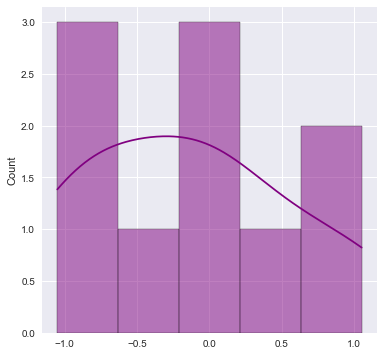

In [113]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(x = x_scalar[0], color='purple', kde=True)

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar,y,test_size = 0.30, random_state= 355)

In [115]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [116]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['group',
 'CSE_dis_math_score',
 'EEE_elctrnc_circuits_score',
 'CSE_softwr_devlplmnt_score',
 'Mathematics_ivs_score',
 'Education_level_of_parent',
 'gender_female',
 'gender_male',
 'Admission_fees_free',
 'Admission_fees_standard']

In [117]:
dtc.score(x_train,y_train)

1.0

In [118]:
dtc.score(x_test,y_test)

0.21666666666666667

In [119]:
dtc.score(x_test,y_test)

0.21666666666666667

In [120]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [121]:
grid_search = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [122]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [123]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'random'}


In [124]:
grid_search.best_score_

0.37142857142857144

In [125]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth =2, min_samples_leaf= 5, min_samples_split= 5, splitter ='random')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5,
                       min_samples_split=5, splitter='random')

In [126]:
dtc.score(x_test,y_test)

0.35

In [127]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [128]:
y_pred = log_reg.predict(x_test)

In [129]:
y_pred

array([5, 0, 5, 0, 5, 1, 5, 5, 1, 5, 4, 3, 5, 5, 5, 0, 5, 0, 0, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 0, 1, 5, 5, 5, 5, 0, 4, 5, 4, 1, 4, 5, 5, 5, 5,
       4, 0, 4, 5, 4, 4, 5, 0, 5, 5, 5, 5, 1, 4, 4, 4], dtype=int64)

In [130]:
log_reg_ac=accuracy_score(y_test,y_pred)

In [131]:
log_reg_ac

0.3

In [132]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [133]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

In [134]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
x, y, random_state=3
)

In [135]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9370629370629371

In [136]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators=10, max_samples=0.5,
                           bootstrap=True, random_state=3, oob_score=True)

In [137]:
bag_knn.oob_score

True

In [138]:
bag_knn.fit(x_train,y_train)
bag_knn.score(x_test,y_test)

0.9370629370629371

In [139]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators=10, max_samples=0.5, 
                                bootstrap=False, random_state=3, oob_score=False)

In [140]:
pasting_knn.fit(x_train,y_train)
pasting_knn.score(x_test,y_test)

0.9300699300699301

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [142]:
x_train,y_train = make_classification(n_samples=1000, n_features=30,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

In [143]:
clf = RandomForestClassifier(max_depth=3, random_state=0)

In [144]:
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.6293706293706294